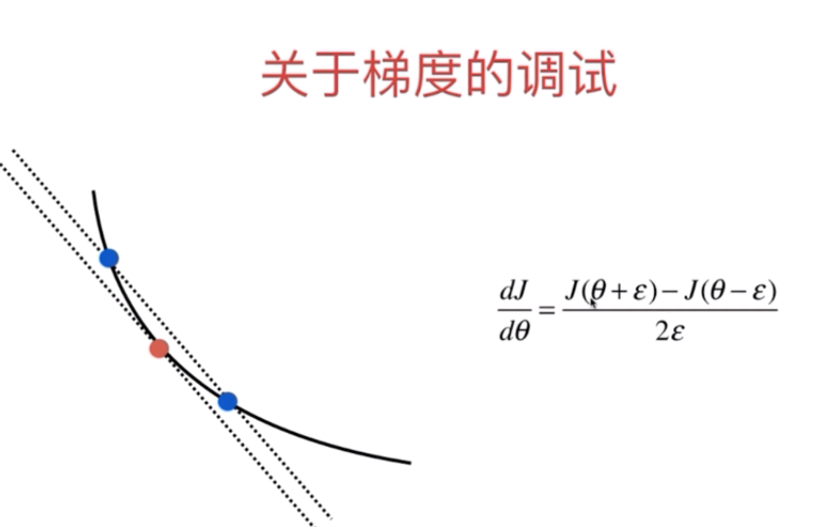

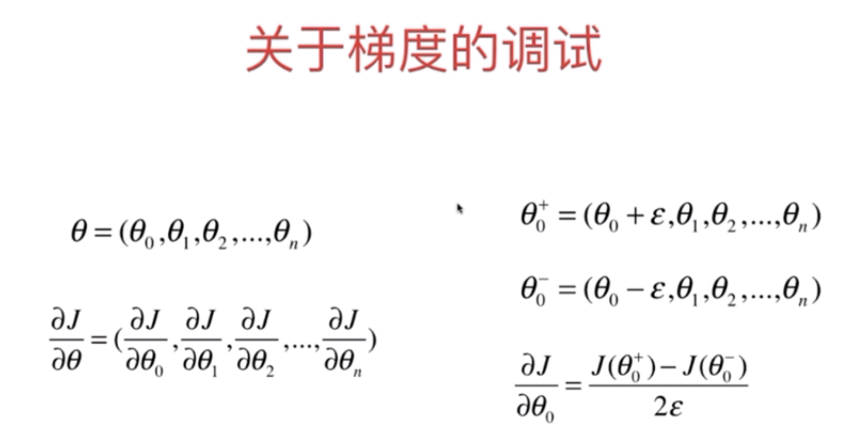

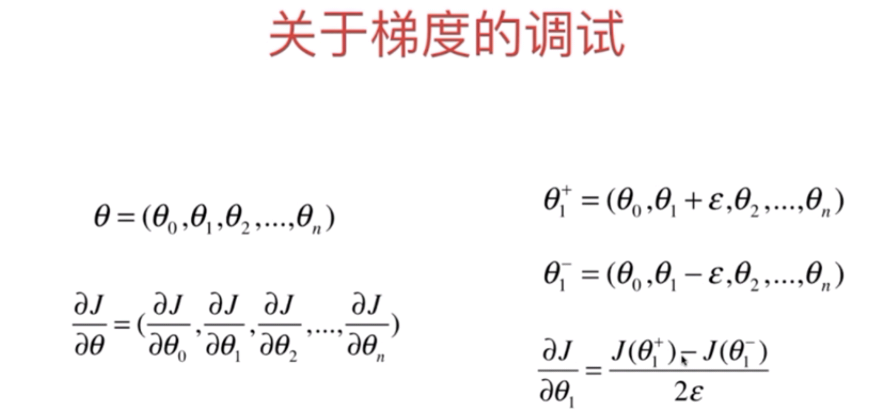

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.random.seed(666)
X = np.random.random(size=(1000,10))

In [17]:
true_theta = np.arange(1, 12, dtype=float)

In [18]:
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [19]:
X.shape

(1000, 10)

In [20]:
y.shape

(1000,)

In [21]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')
    
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2. / len(y)

In [22]:
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
     
    return res    

In [23]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
#     theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient 

#         theta_history.append(theta)
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter +=1    
    return theta 

In [24]:
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta, eta)
theta

CPU times: user 9.67 s, sys: 2.59 s, total: 12.3 s
Wall time: 11.2 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [25]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta, eta)
theta

CPU times: user 1.25 s, sys: 342 ms, total: 1.6 s
Wall time: 1.44 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])